In [11]:
# Example of chaotic migration using dynamical tides operator
import rebound
import reboundx
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 14})

# intial conditions
a0 = 1.7
e0 = 0.98
R_planet = 1.6 * 4.67e-4 # 1.6 Jupiter radii
m_planet = 1e-3 # approximately 1 Jupiter mass

# create simulation
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=m_planet, r=R_planet, a=a0, e=e0)

# load reboundx and the dynamical tides operator
rebx = reboundx.Extras(sim)
td = rebx.load_operator('tides_dynamical')
rebx.add_operator(td)

# set dP_crit = 0 to always carry out mode evolution
sim.particles[1].params['td_dP_crit'] = 0

# set initial modes to 0
sim.particles[1].params['td_c_imag'] = 0
sim.particles[1].params['td_c_real'] = 0

# record initial orbital energy
o = sim.particles[1].orbit(primary=sim.particles[0])
EB0 = -sim.G * sim.particles[1].m * sim.particles[0].m / (2 * o.a)

N = 1000
t = np.linspace(0, 1e5, N) # time
a = np.zeros(N) # semi-major axis
e = np.zeros(N) # eccentricity
E = np.zeros(N) # mode energy
E_sim = np.zeros(N) # simulation energy
L = np.zeros((N, 3)) # total angular momentum

for i, time in enumerate(t):
    o = sim.particles[1].orbit(primary=sim.particles[0])
    a[i] = o.a
    e[i] = o.e
    L[i, :] = sim.angular_momentum() 
    E[i] = abs(EB0) * (sim.particles[1].params['td_c_imag']**2 + sim.particles[1].params['td_c_real']**2)
    E_sim[i] = sim.energy()

    if i % 20 == 0:
        print(time, o.a, o.e, E[i])
    
    sim.integrate(2 * np.pi * time)
    



0.0 1.6999999999999869 0.9799999999999998 0.0
2002.0020020020022 1.680165656574061 0.9797614619316348 3.472056692283107e-06
4004.0040040040044 1.6706697660306857 0.9796452334664247 5.163521638435682e-06
6006.006006006007 1.6596389045730309 0.979508529601064 7.152706808459329e-06
8008.008008008009 1.680099644320503 0.9797606585325722 3.483749190310794e-06
10010.01001001001 1.6419852714266672 0.9792858879145874 1.0391783569368545e-05
12012.012012012014 1.6974531014241847 0.9799696848520845 4.413007194748837e-07
14014.014014014016 1.6969138063791556 0.9799632539522077 5.349142059952519e-07
16016.016016016018 1.6719933417160187 0.9796615138754472 4.926605465801394e-06
18018.018018018018 1.6959994945104142 0.9799523416698999 6.937607719139361e-07
20020.02002002002 1.698246126031849 0.979979133890992 3.03750975238754e-07
22022.022022022025 1.6775396287215314 0.9797294526979041 3.937903884801668e-06
24024.024024024027 1.6716017540237031 0.9796566999345819 4.996658447950505e-06
26026.026026026

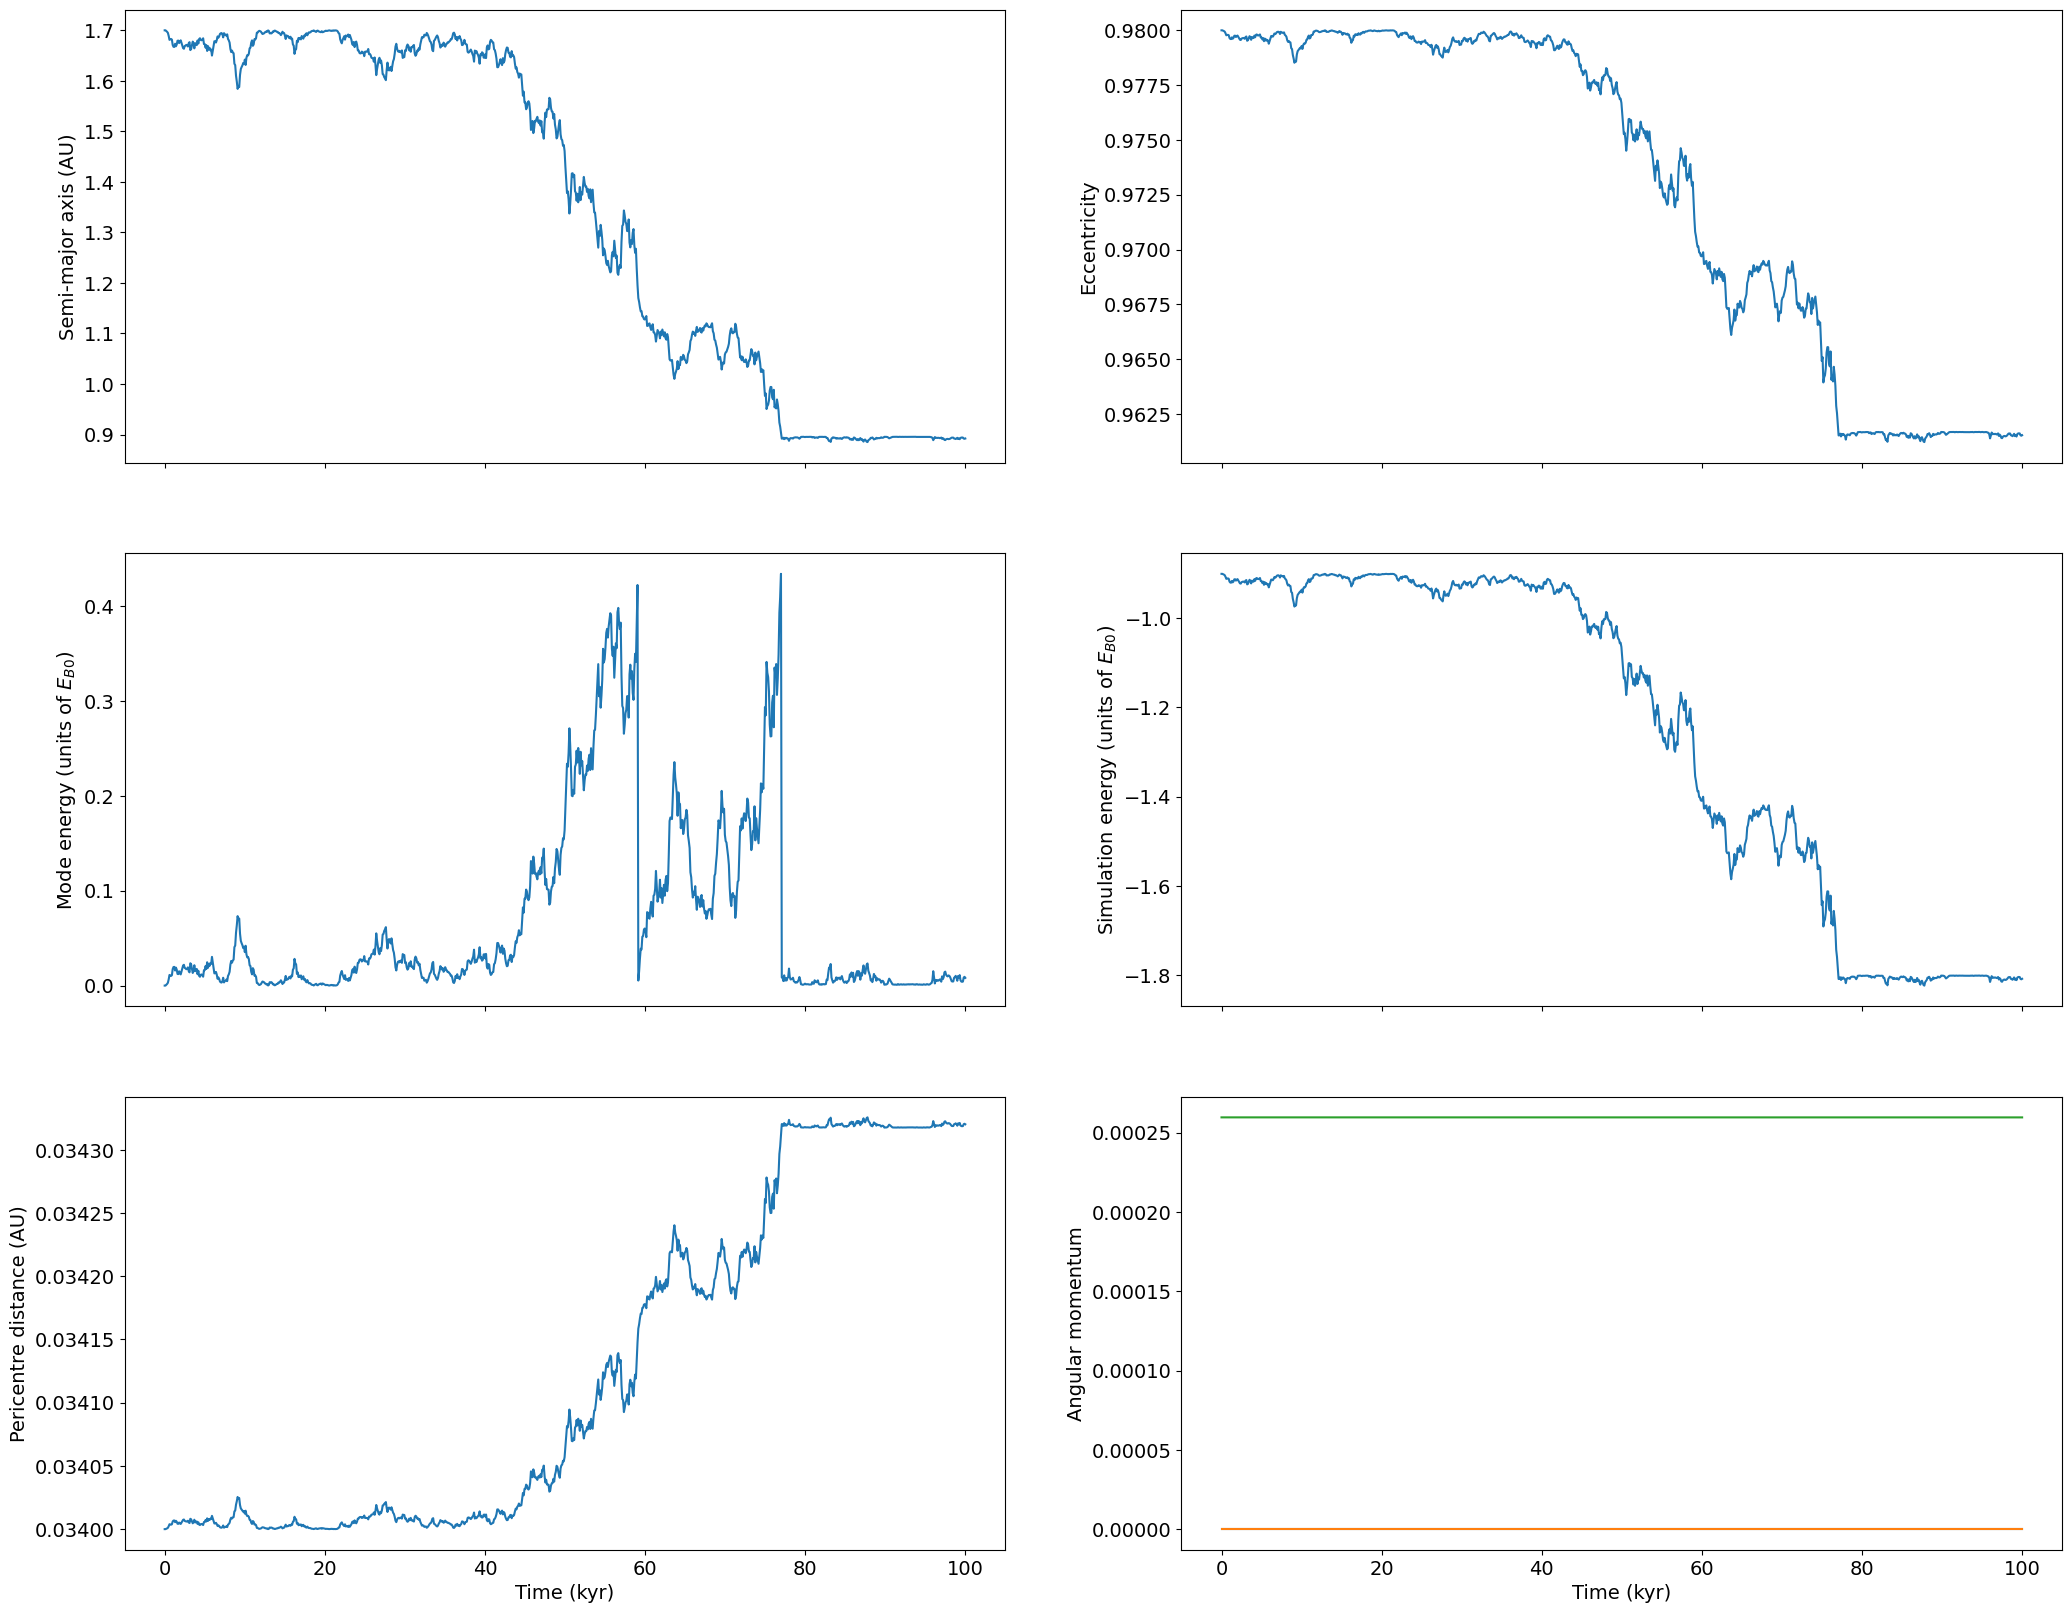

In [12]:
fig, axes = plt.subplots(3, 2, sharex=True)
fig.set_figheight(20)
fig.set_figwidth(25)


axes[0, 0].plot(t / 1e3, a)
axes[0, 0].set_ylabel(r'Semi-major axis (AU)')

axes[0, 1].plot(t / 1e3, e)
axes[0, 1].set_ylabel(r'Eccentricity')

axes[1, 0].plot(t / 1e3, -E / EB0)
axes[1, 0].set_ylabel(r'Mode energy (units of $E_{B0}$)')

axes[1, 1].plot(t / 1e3, -E_sim / EB0)
axes[1, 1].set_ylabel(r'Simulation energy (units of $E_{B0}$)')

axes[2, 0].plot(t / 1e3, a * (1-e))
axes[2, 0].set_ylabel(r'Pericentre distance (AU)')
axes[2, 0].set_xlabel(r'Time (kyr)')

axes[2, 1].plot(t / 1e3, L[:,0])
axes[2, 1].plot(t / 1e3, L[:,1])
axes[2, 1].plot(t / 1e3, L[:,2])
axes[2, 1].set_ylabel('Angular momentum')
axes[2, 1].set_xlabel(r'Time (kyr)')

plt.show()
